In [1]:

import nltk.corpus
from nltk.corpus import inaugural
from nltk.probability import FreqDist


In [2]:
import glob
allpath=[]                     #save  all path
for name in glob.glob('/Users/zifuche/nltk_data/corpora/inaugural/*.txt'):
    allpath.append(name)
    
needpath=allpath[-25:-2]      #  12 txt
    
    

In [3]:
import string
from string import punctuation
def readtxt(path):                                               #read file
    wordlist=[]
    f=open(path,'r',encoding='utf-8',errors='ignore')
    for line in f:
        for word in line.split():
            word=word.translate(str.maketrans('','',string.punctuation))         # remove punctuation
            word=word.lower()
            wordlist.append(word)                
    return wordlist   
        



In [4]:
#  from string import punctuation
# def readtxt(path):
#     wordlist=[]
#     f=open(path,'r')
#     for line in f.readlines():
#         for word in line.split(" "):
#             word=''.join(c for c in word if c not in punctuation)
#             word=word.lower()
#             if word.endswith("\n"):
#                 word=word[:-2]                
#             if word!="\n" and word!=None and word!="":
#                 wordlist.append(word)                
#     return wordlist 

In [5]:
totalwordlist=[]
for path in needpath:
    l=readtxt(path)
    totalwordlist.extend(l)
    
    
    
    







In [6]:
def rank(w):                          # rank
    ra=[]
    count=1
    for t in w:
        r=(count,t[0],t[1])     
        count=count+1
        ra.append(r)
    return ra
          
        
           
    

In [7]:
freq=FreqDist(totalwordlist)        #freq

w=sorted(freq.items(),key=lambda x:x[1],reverse=True)  #sort

csvlist=rank(w)      



In [8]:
import csv
with open("/Users/zifuche/Desktop/pythoncsv/assign2-1.csv", 'a') as outcsv:
    writer=csv.writer(outcsv,delimiter=',', quotechar='|',quoting=csv.QUOTE_MINIMAL, lineterminator='\n')
    for item in csvlist:
        writer.writerow([item[0], item[1], item[2]])

In [15]:
import matplotlib.pyplot as pltl
%matplotlib inline


ranks=[i[0] for i in csvlist]
fre=[i[2] for i in csvlist]



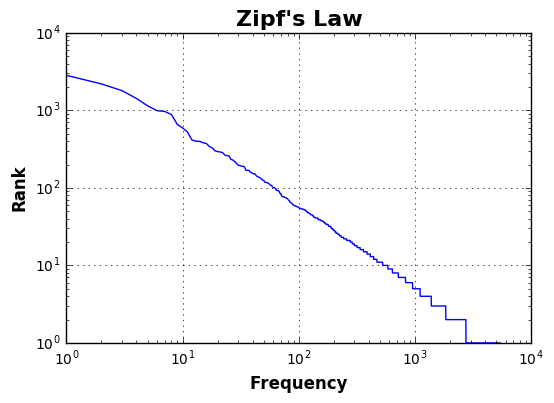

In [17]:
pltl.loglog(ranks,fre)
pltl.title("Zipf\'s Law",fontsize=16,fontweight="bold")
pltl.xlabel("Frequency",fontsize=12,fontweight="bold")
pltl.ylabel("Rank",fontsize=12,fontweight="bold")
pltl.grid(True)
pltl.show()

Conclusion:
Zipf's law states that given some corpus of natural language utterances, the frequency of any word is inversely proportional to its rank in the frequency table.Zipf's law states that given some corpus of natural language utterances, the frequency of any word is inversely proportional to its rank in the frequency table. 